## ---------------------------------------------------   *Car Price Prediction*   ------------------------------------------
![](download.jpg)

#### *Description* 
*This dataset contains information about used cars.*
*This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.*
*The columns in the given dataset are as follows:*

- *name*     
-*year*      
-*selling_price*       
-*km_driven*        
-*fuel*     
-*seller_type*     
-*transmission*    
-*Owner*   

In [76]:
import sys
!{sys.executable} -m pip install pandas-profiling

  Using cached pandas_profiling-2.11.0-py2.py3-none-any.whl (243 kB)
  Using cached tangled_up_in_unicode-0.0.7-py3-none-any.whl (3.1 MB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached visions-0.6.0-py3-none-any.whl (75 kB)
  Using cached confuse-1.4.0-py2.py3-none-any.whl (21 kB)
Processing c:\users\himanshu wagh\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243\htmlmin-0.1.12-py3-none-any.whl
Processing c:\users\himanshu wagh\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2\phik-0.11.2-py3-none-any.whl
  Using cached ImageHash-4.2.0-py2.py3-none-any.whl (295 kB)


In [77]:
# importing all packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [4]:
# import dataset
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#check for any missing values 
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [79]:
pandas_profiling.ProfileReport(df)

In [7]:
df['current_year']=2021
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [8]:
df['car_age']=df['current_year']-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [9]:
df.drop('Year',axis=1,inplace=True)
df.drop('current_year',axis=1,inplace=True)

df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
df['car_age'].value_counts()

6     61
5     50
7     38
4     35
8     33
9     23
10    19
11    15
13     7
12     6
16     4
15     4
18     2
14     2
17     1
3      1
Name: car_age, dtype: int64

In [11]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,3.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000


In [12]:
df_final=df[['car_age','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
df_final.head()

,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


Text(0.5, 1.0, 'number of Past Owners:')

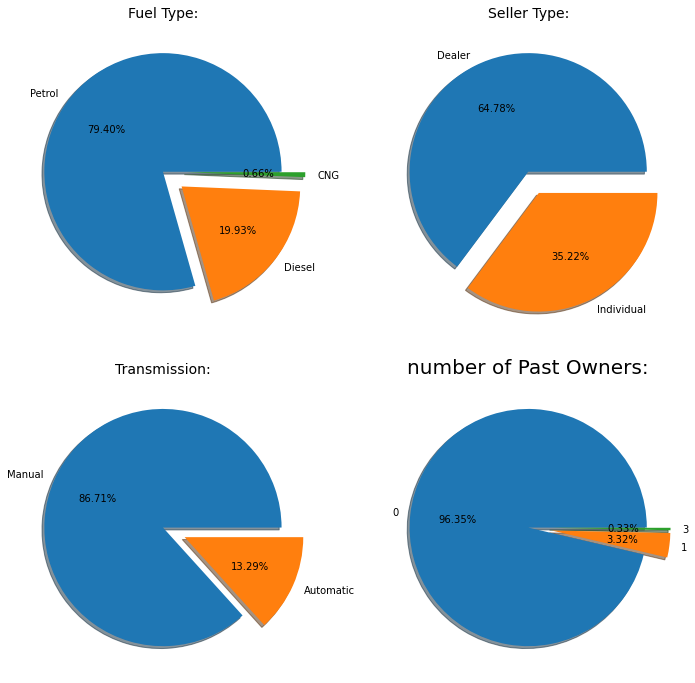

In [62]:
# visualizing through pie charts

fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = df['Fuel_Type'].value_counts().index.tolist()
values = df['Fuel_Type'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax1.set_title("Fuel Type:", fontdict={'fontsize': 14})

labels = df['Seller_Type'].value_counts().index.tolist()[:2]
values = df['Seller_Type'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Seller Type:", fontdict={'fontsize': 14})

labels = df['Transmission'].value_counts().index.tolist()[:2]
values = df['Transmission'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Transmission:", fontdict={'fontsize': 14})

labels = df['Owner'].value_counts().index.tolist()
values = df['Owner'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax4.set_title("number of Past Owners:", fontdict={'fontsize': 20})

In [13]:
df_final=pd.get_dummies(df_final,drop_first=True)
df_final.head()

,car_age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,3.35,5.59,27000,0,0,1,0,1
1,8,4.75,9.54,43000,0,1,0,0,1
2,4,7.25,9.85,6900,0,0,1,0,1
3,10,2.85,4.15,5200,0,0,1,0,1
4,7,4.60,6.87,42450,0,1,0,0,1


In [14]:
corr=df_final.corr()

<AxesSubplot:>

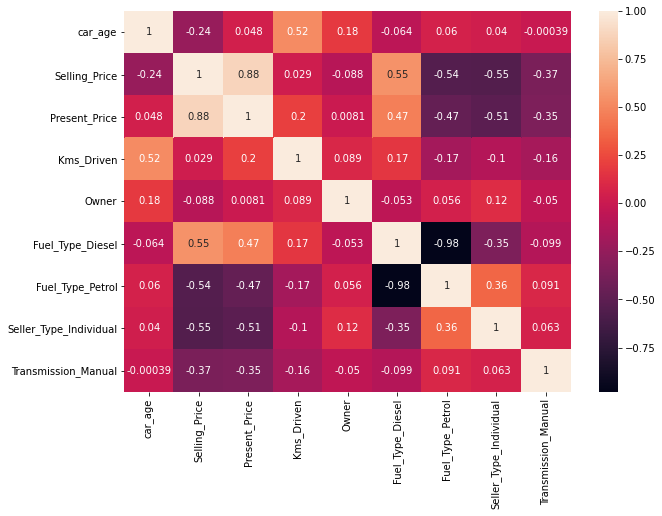

In [15]:
#plotting correlation matrix 
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

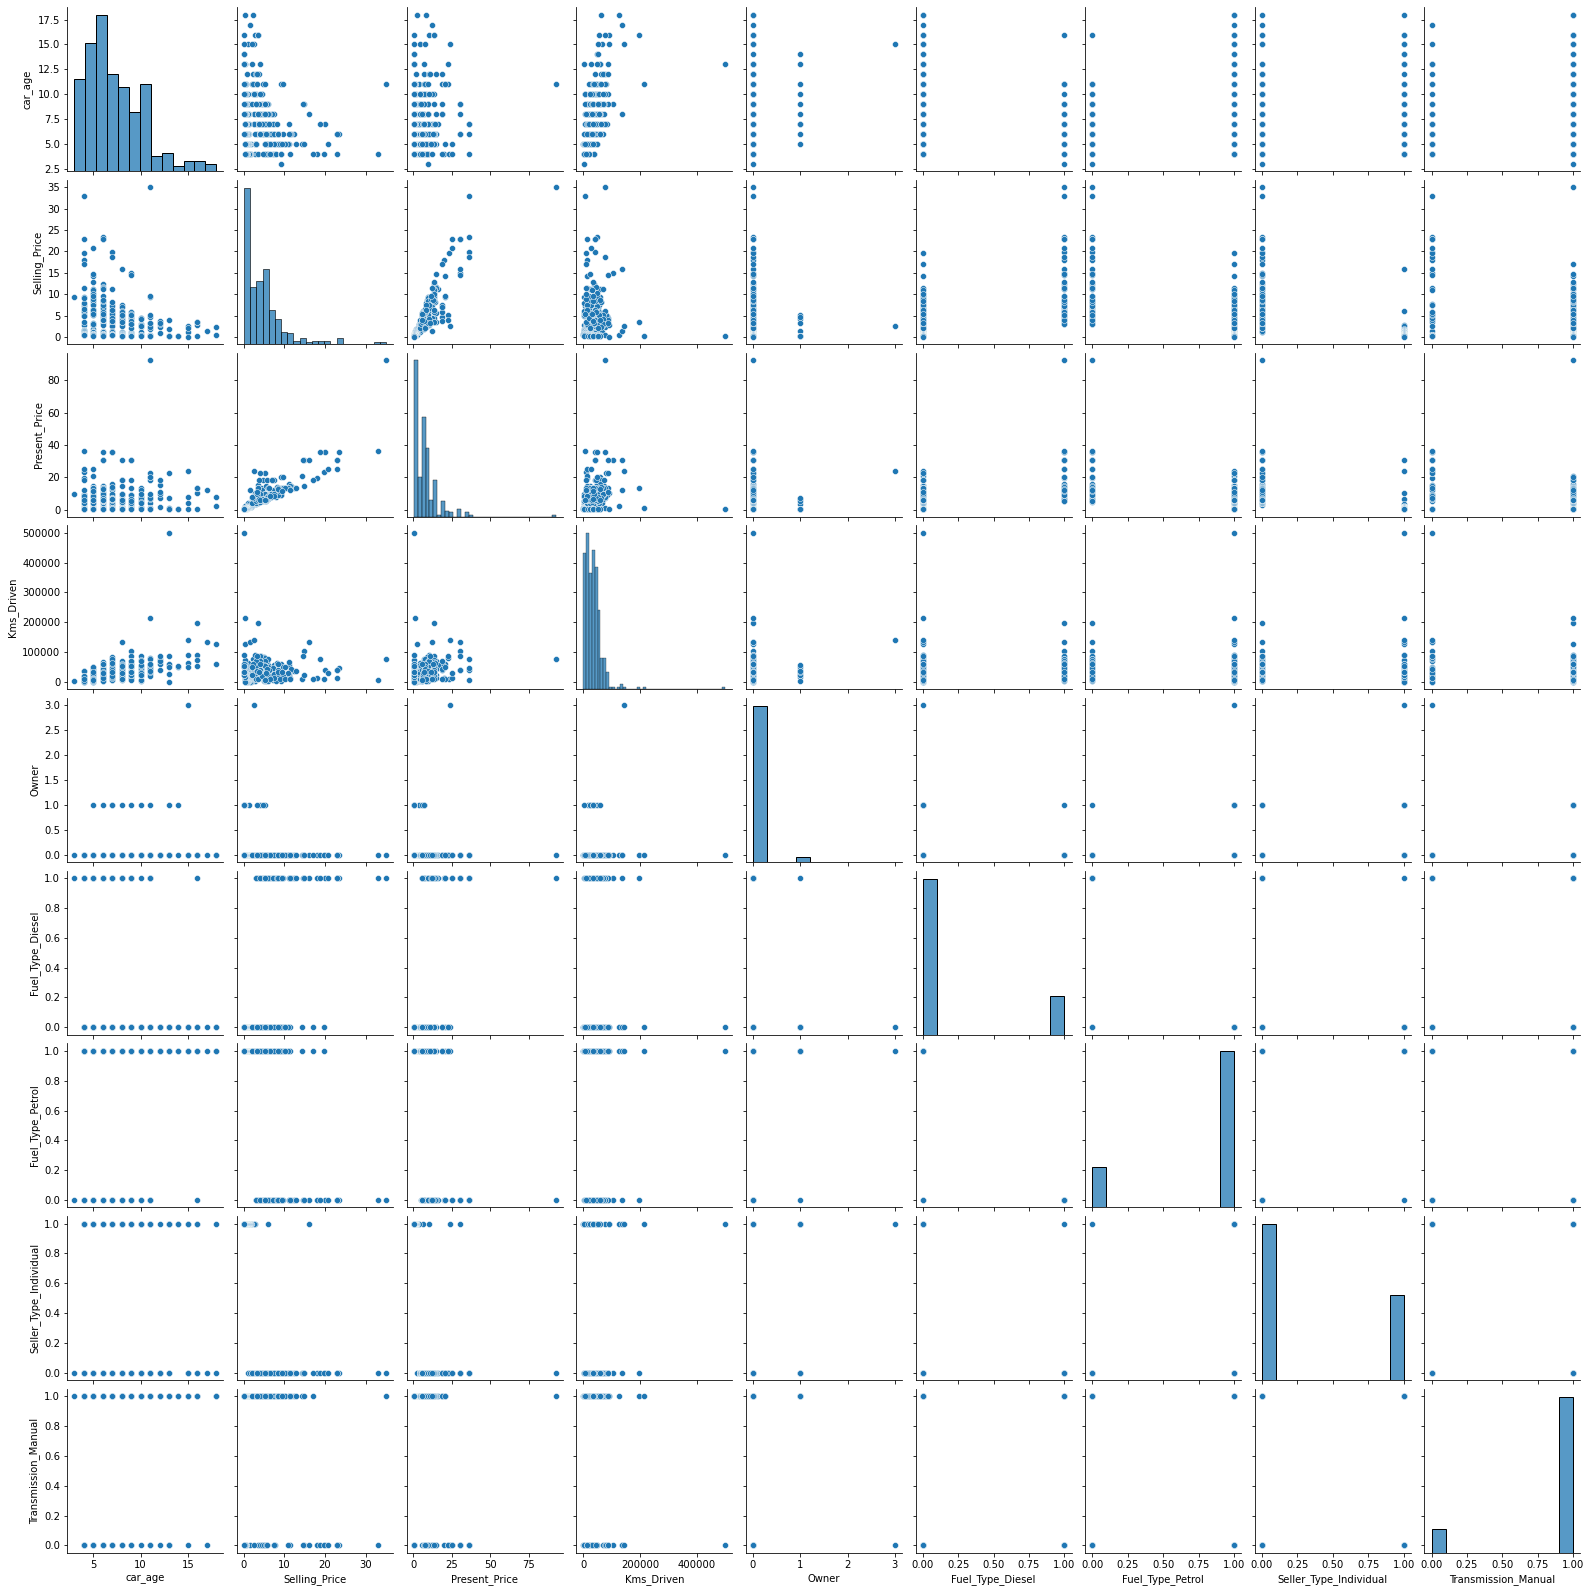

In [16]:
sns.pairplot(df_final)

In [17]:
y=df_final['Selling_Price']
x=df_final.drop('Selling_Price',axis=1)


In [18]:
x.head()

,car_age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,5.59,27000,0,0,1,0,1
1,8,9.54,43000,0,1,0,0,1
2,4,9.85,6900,0,0,1,0,1
3,10,4.15,5200,0,0,1,0,1
4,7,6.87,42450,0,1,0,0,1


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

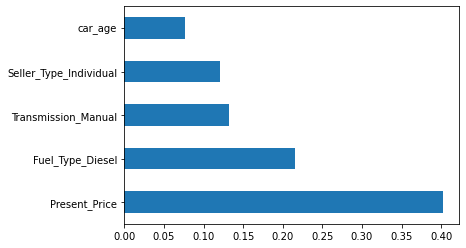

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
predictions=model.predict(X_test)

E:\New_folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

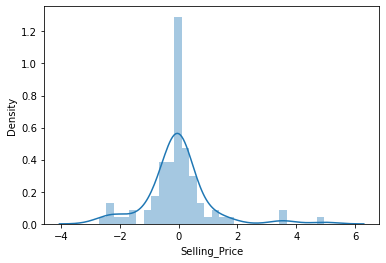

In [53]:
sns.distplot(y_test-predictions)

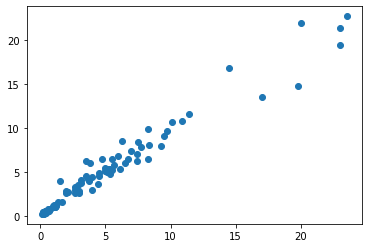

In [54]:
plt.scatter(y_test,predictions)

In [55]:
from sklearn import  metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6392329670329672
MSE: 1.2024384101098908
RMSE: 1.0965575270408254


### *Random Forest Regressor with RandomizedSearchCV*

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [40]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [42]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:

rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [45]:
rf_random.best_score_

-4.537438486389381

In [46]:
predictions=rf_random.predict(X_test)

E:\New_folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

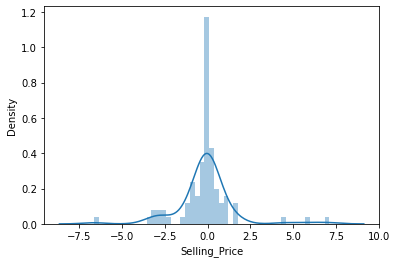

In [47]:
sns.distplot(y_test-predictions)

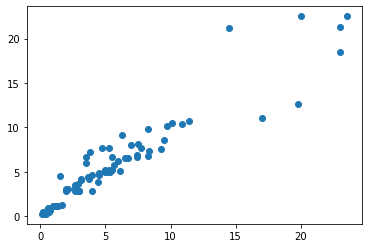

In [48]:

plt.scatter(y_test,predictions)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8828997955873079
MSE: 2.7058616417591366
RMSE: 1.6449503462898618


In [51]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)